In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import os

In [2]:
data=pd.read_csv("sampledata/StudentsPerformance.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 데이터가 정상적으로 읽어왔는지 확인하는 것 (head, tail, sample)

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [6]:
# 랜덤하게 확인 -> 갯수 중심
data.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
474,female,group B,associate's degree,standard,completed,90,90,91
369,female,group D,some high school,standard,none,73,84,85
93,male,group C,associate's degree,free/reduced,completed,43,45,50
760,female,group C,high school,free/reduced,none,53,72,64
289,male,group E,some high school,standard,completed,77,76,77


In [7]:
data.sample(frac=0.1)  # 전체 데이터의 10%만 출력

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
147,male,group C,associate's degree,free/reduced,none,73,68,66
556,female,group C,associate's degree,standard,completed,55,72,79
803,female,group B,some college,standard,none,82,85,87
872,male,group B,associate's degree,standard,completed,82,84,78
305,male,group A,some college,standard,none,69,67,69
...,...,...,...,...,...,...,...,...
667,female,group B,bachelor's degree,free/reduced,none,77,85,87
814,female,group C,high school,standard,none,72,80,83
353,female,group C,associate's degree,standard,none,46,58,57
644,male,group B,high school,standard,none,70,65,60


### describe() 데이터의 일반적인 정리 (숫자 정보만 가져옴)

In [8]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### 각 컬럼의 확인 -> info도 있지만 dtypes도 있음

In [9]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### 상관계수 corr() : 각 데이터 간의 관계

In [10]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


## 구멍난 데이터 확인하기
### 1) isnull().values.any() : 하나라도 구멍났으면 True

In [14]:
data.isnull().values.any()

False

### 2) isnull().sum() : True의 값을 더한다 -> 0이면 구멍 없음

In [15]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [16]:
data.isnull().sum().sum()

0

In [17]:
data.rename(columns=({'gender':'Gender',
                      'race/ethnicity':'Race/Ethnicity',
                      'parental level of education':'Parental_Level_of_Education'
                    ,'lunch':'Lunch','test preparation course':'Test_Preparation_Course'
                      ,'math score':'Math_Score','reading score':'Reading_Score'
                     ,'writing score':'Writing_Score'}),inplace=True)

In [19]:
data["Gender"].value_counts()

female    518
male      482
Name: Gender, dtype: int64

In [20]:
data["Gender"].value_counts().index

Index(['female', 'male'], dtype='object')

In [21]:
data["Gender"].unique()

array(['female', 'male'], dtype=object)

# seaborn 그리기

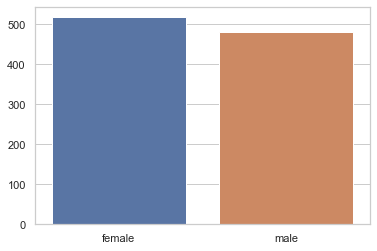

In [28]:
# 기본적인 그리기 위한 스타일 지정 (디폴트 이기에 선언 안해도 됨)
sns.set(style="whitegrid")

# 정확하게 x, y에 대한 값을 지정하면서 그리는 스타일
ax=sns.barplot(x=data["Gender"].value_counts().index,
               y=data["Gender"].value_counts().values)

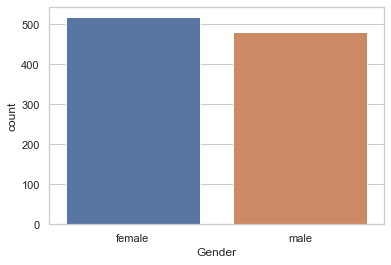

In [29]:
# 데이터를 기준으로 컬럼을 지정하는 방식
sns.countplot(data=data, x="Gender")

In [30]:
data["Race/Ethnicity"].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: Race/Ethnicity, dtype: int64

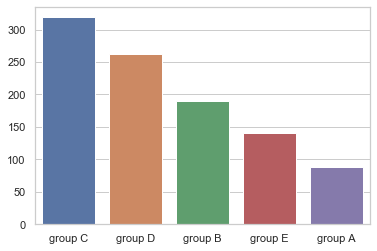

In [31]:
ax = sns.barplot(x=data["Race/Ethnicity"].value_counts().index,
                 y=data["Race/Ethnicity"].value_counts().values)

In [33]:
data["Parental_Level_of_Education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Parental_Level_of_Education, dtype: int64

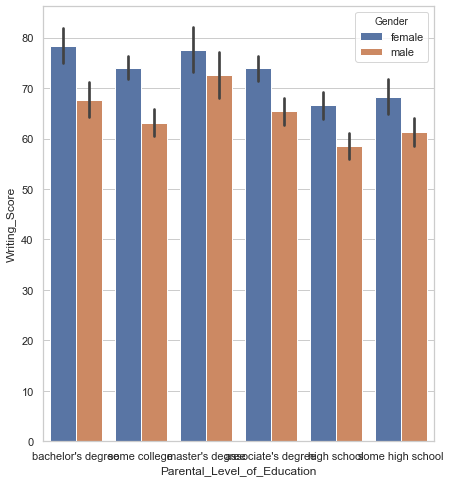

In [57]:
plt.figure(figsize=(7,8))
sns.barplot(data=data,
               x="Parental_Level_of_Education",
               y="Writing_Score",
               hue="Gender")

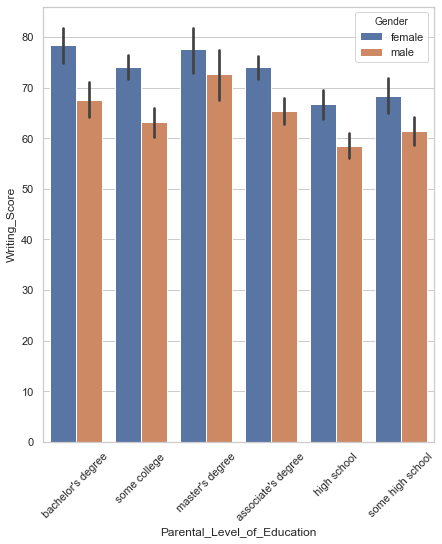

In [54]:
plt.figure(figsize=(7,8))
sns.barplot(data=data,
               x="Parental_Level_of_Education",
               y="Writing_Score",
               hue="Gender")

plt.xticks(rotation=45)
plt.show()

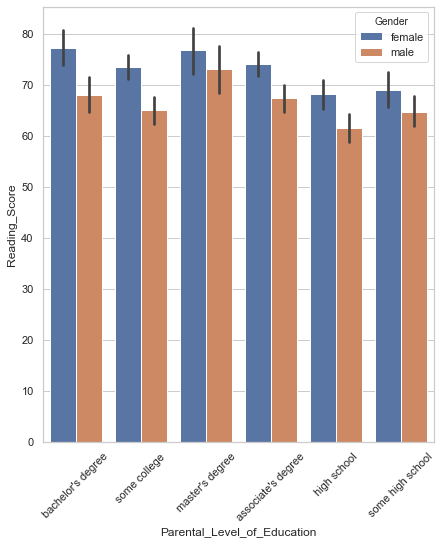

In [53]:
plt.figure(figsize=(7,8))
sns.barplot(data=data,
            x="Parental_Level_of_Education",
            y="Reading_Score",
            hue="Gender")

plt.xticks(rotation=45)
plt.show()

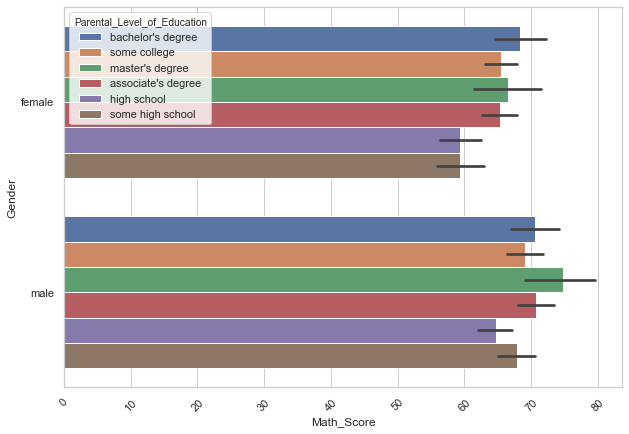

In [47]:
plt.figure(figsize=(10,7))

sns.barplot(data=data,
            x="Math_Score",
            y="Gender",
            hue="Parental_Level_of_Education")

plt.xticks(rotation=45)
plt.show()

#### 기타 옵션 관련

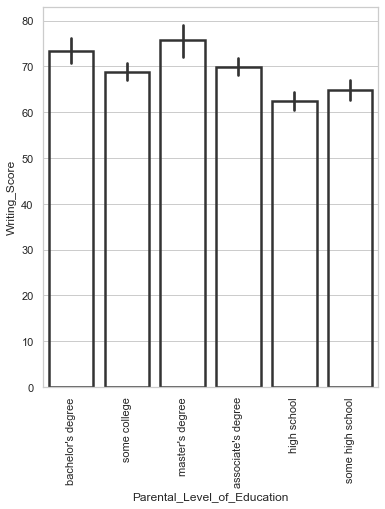

In [67]:
plt.figure(figsize=(6,7))
sns.barplot("Parental_Level_of_Education",
            "Writing_Score",
            data=data,
            linewidth=2.5,
            facecolor=(1, 1, 1, 0),
            errcolor=".2", 
            edgecolor=".2")
plt.xticks(rotation=90)
plt.show()

In [68]:
data["Test_Preparation_Course"].value_counts()

none         642
completed    358
Name: Test_Preparation_Course, dtype: int64

In [72]:
data_lunch_score=data[data["Test_Preparation_Course"]=="completed"].groupby(data["Lunch"]).Writing_Score.mean()
data_lunch_score

Lunch
free/reduced    70.351145
standard        76.766520
Name: Writing_Score, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

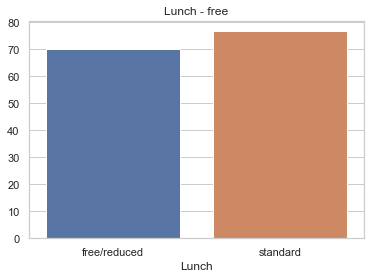

In [76]:
plt.title("Lunch - free")
sns.barplot(x=data_lunch_score.index, y=data_lunch_score.values)
plt.show